In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv("titanic_train.csv")

In [3]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variable Description
PassengerId: unique id number to each passenger
    
Survived: passenger survive(1) or died(0)
    
Pclass: passenger class
    
Name: name
    
Sex: gender of passenger
    
Age: age of passenger
    
SibSp: number of siblings/spouses
    
Parch: number of parents/children
    
Ticket: ticket number
    
Fare: amount of money spent on ticket
    
Cabin: cabin category
    
Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


float64(2): Fare ve Age
int64(5): Pclass, sibsp, parch, passengerId and survived
object(5): Cabin, embarked, ticket, name and sex


Univariate Variable Analysis

Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
    
    
Numerical Variable: Fare, age and passengerId
    

# Categorical Variable

In [7]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

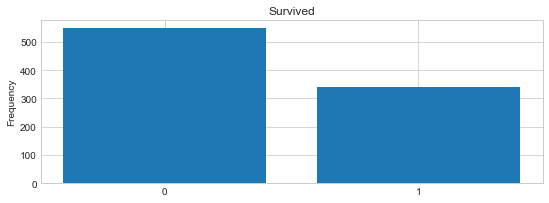

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


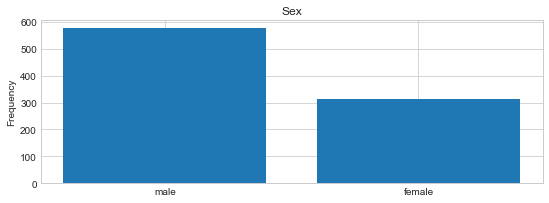

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


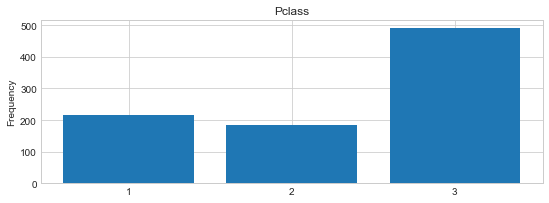

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


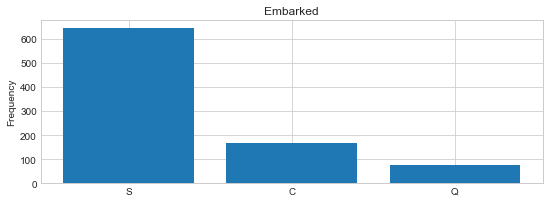

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


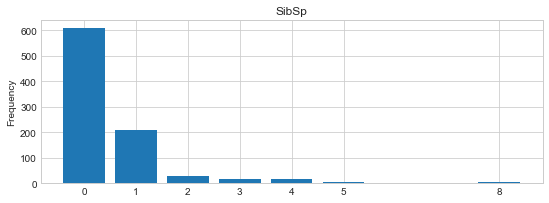

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


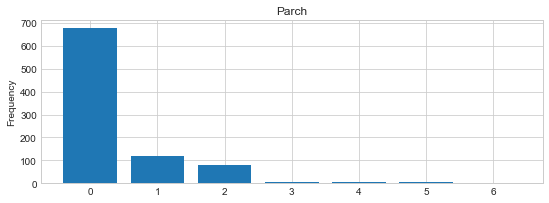

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)


In [9]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



# Numerical Variable¶

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

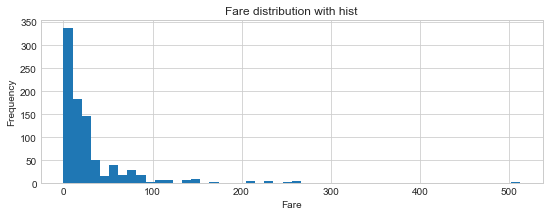

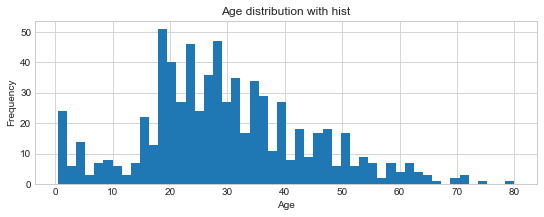

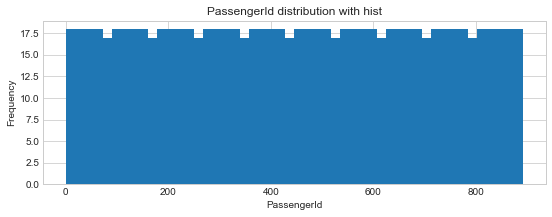

In [11]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)


Basic Data Analysis
Pclass - Survived
Sex - Survived
SibSp - Survived
Parch - Survived


In [12]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outlier Detection

In [16]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [17]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)


In [19]:
train_df_len = len(train_df)
#train_df = pd.concat([train_df],axis = 0).reset_index(drop = True)


# Find Missing Value

In [20]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

# Fill Missing Value
Embarked has 2 missing value

Age has 170

Cabin has 680

In [22]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


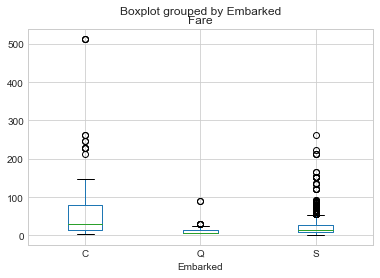

In [23]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [24]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Visualization

Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

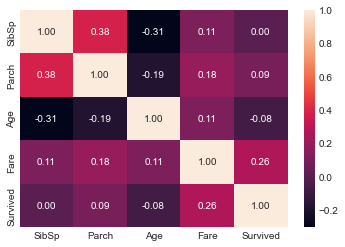

In [25]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

# SibSp -- Survived

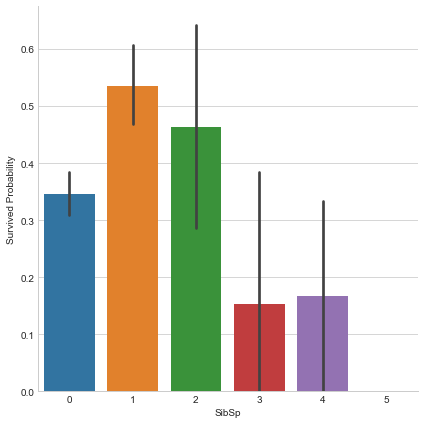

In [26]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Having a lot of SibSp have less chance to survive.

if sibsp == 0 or 1 or 2, passenger has more chance to survive

we can consider a new feature describing these categories.


# Parch -- Survived

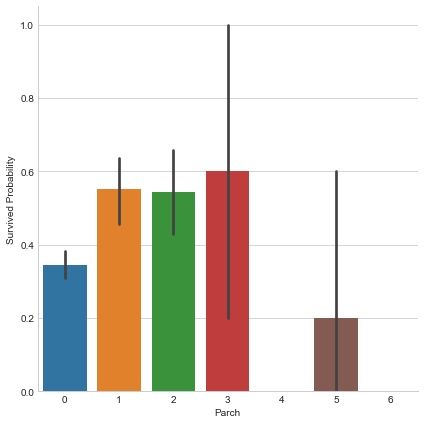

In [27]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Sibsp and parch can be used for new feature extraction with th = 3

small familes have more chance to survive.

there is a std in survival of passenger with parch = 3

# Pclass -- Survived

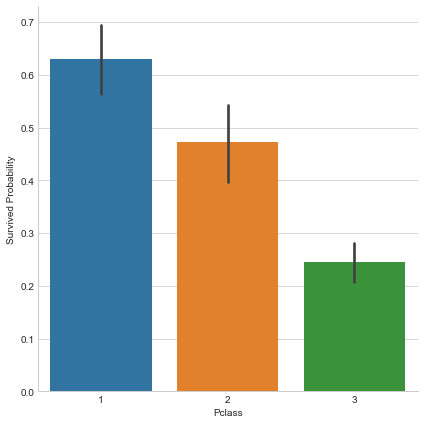

In [28]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

# Age -- Survived

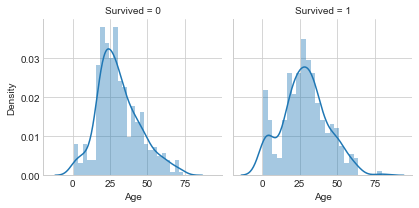

In [29]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

age <= 10 has a high survival rate,

oldest passengers (75) survived,

large number of 20 years old did not survive,

most passengers are in 20-35 age range,

use age feature in training

use age distribution for missing value of age

# Pclass -- Survived -- Age

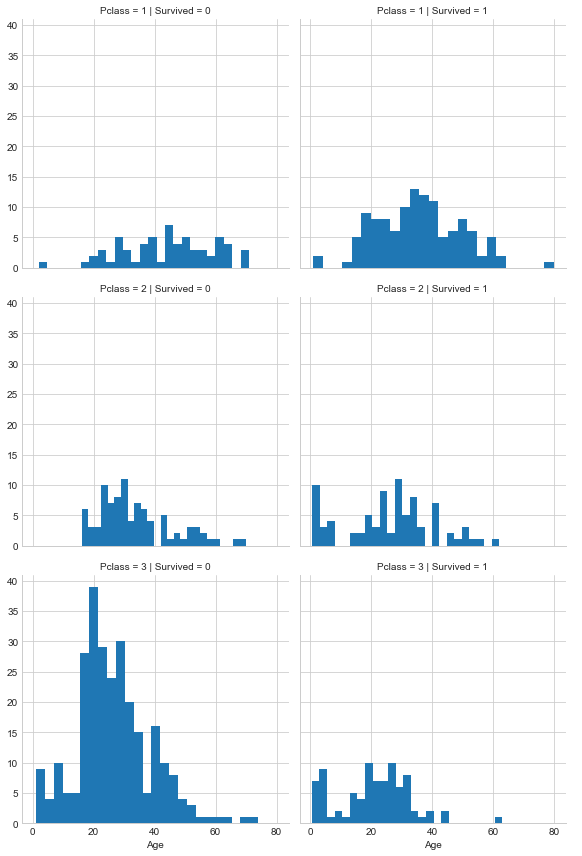

In [30]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 4)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

pclass is important feature for model training.

# Embarked -- Sex -- Pclass -- Survived

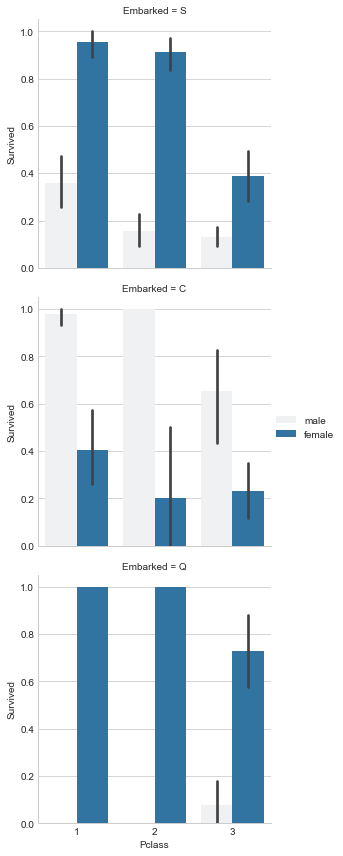

In [31]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 4)
g.map(sns.barplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

Female passengers have much better survival rate than males.

males have better survşval rate in pclass 3 in C.

embarked and sex will be used in training

# Embarked -- Sex -- Fare -- Survived¶

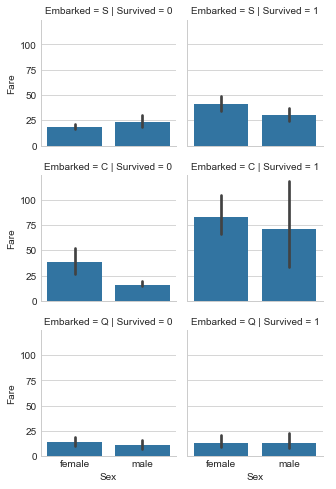

In [32]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Passsengers who pay higher fare have better survival.

Fare can be used as categorical for training.


In [33]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


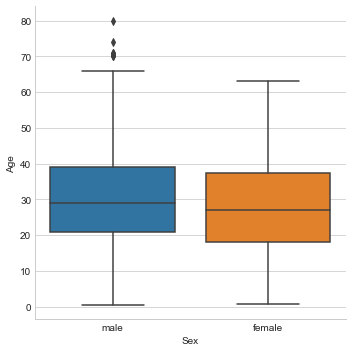

In [34]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

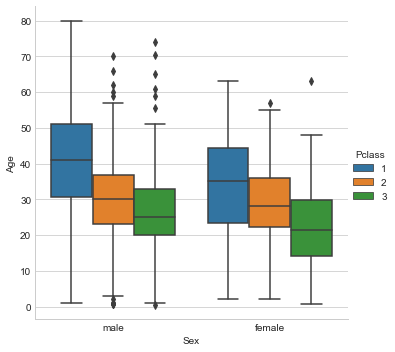

In [35]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

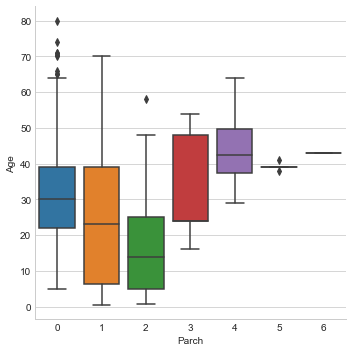

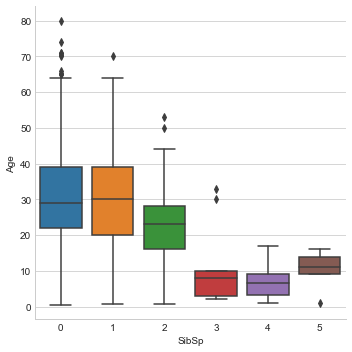

In [36]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

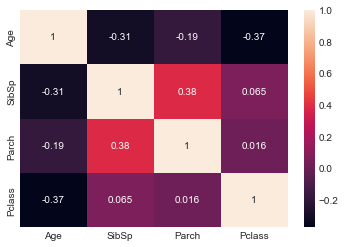

In [37]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [38]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [39]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Feature Engineering

In [40]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [41]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [42]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

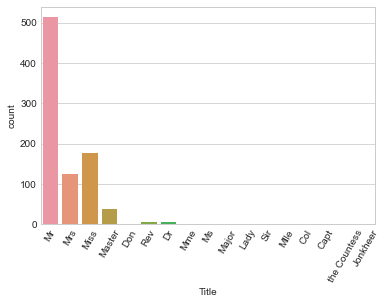

In [43]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [44]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

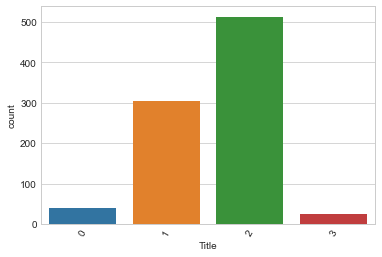

In [45]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

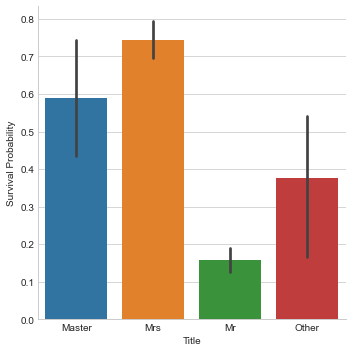

In [46]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [47]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [49]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


# Family Size

In [50]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


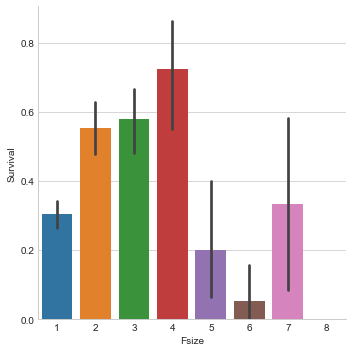

In [52]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [53]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [54]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


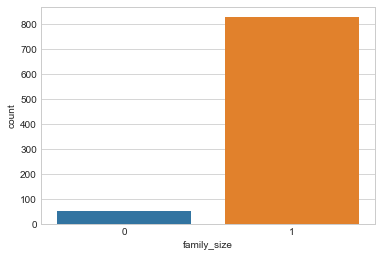

In [55]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

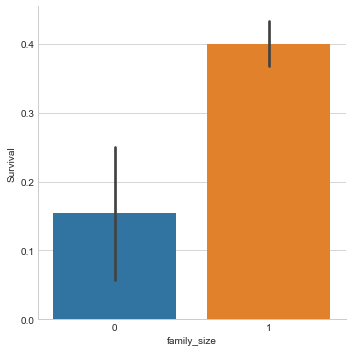

In [56]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small familes have more chance to survive than large families.

In [57]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


# Embarked

In [58]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

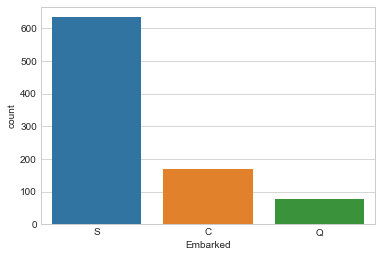

In [59]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [60]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


# Ticket

In [61]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [62]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [63]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [64]:
train_df["Ticket"].head(20)


0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,female,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,female,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,female,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,male,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [66]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,male,26.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


# Pclass

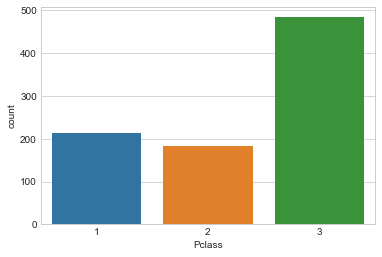

In [67]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [68]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,female,26.0,0,0,7.9250,NaN,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


# Sex

In [69]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,NaN,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


# Drop Passenger ID and Cabin

In [70]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)


In [71]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis',
       'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

# Modeling

# Train - Test Split

In [72]:
train_df_len

881

In [73]:
x=train_df.iloc[:,0:-1]
x.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female
0,0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,1
2,1,26.0,0,0,7.9250,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,1,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,0,1,1,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [74]:
y=train_df.iloc[:,-1]
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex_male, dtype: uint8

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [76]:
x_train.shape

(590, 50)

In [77]:
y_train.shape

(590,)

In [78]:
x_test.shape

(291, 50)

In [79]:
y_test.shape

(291,)

In [80]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 100.0
Testing Accuracy: % 100.0


In [81]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [82]:
pred=logreg.predict(x_test)
print(pred)

[0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0]


# Hyperparameter Tuning -- Grid Search -- Cross Validation

# We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

Decision Tree

SVM

Random Forest

KNN

Logistic Regression

In [83]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 1.0


A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrix

In [84]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,pred))

[[109   0]
 [  0 182]]


In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       182

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       182

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



# GaussianNB

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [88]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predmnb=gnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

1.0
[[ 70   0]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       124

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



In [89]:
#support vector classifier

svc=SVC()
svc.fit(x_train,y_train)
predmnb=svc.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.654639175257732
[[  6  64]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.67      0.09      0.15        70
           1       0.65      0.98      0.78       124

    accuracy                           0.65       194
   macro avg       0.66      0.53      0.47       194
weighted avg       0.66      0.65      0.56       194



In [90]:
# n_neighbors=5          default

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7989690721649485
[[ 44  26]
 [ 13 111]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69        70
           1       0.81      0.90      0.85       124

    accuracy                           0.80       194
   macro avg       0.79      0.76      0.77       194
weighted avg       0.80      0.80      0.79       194



In [91]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
ac=accuracy_score(y_test,p)
round(ac,3)

1.0

In [92]:
# AUC AND ROC CURVE(AREA UNDER COVER AND RECEIVER OPERATING CHARCTERSTICS)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [93]:
y_pred_prob=logreg.predict_proba(x_test)[:,1]

In [94]:
y_pred_prob

array([0.99452008, 0.99486785, 0.01330992, 0.00964844, 0.99303635,
       0.96124306, 0.9889387 , 0.99269932, 0.99514647, 0.98874344,
       0.99440193, 0.01219458, 0.01350963, 0.99443596, 0.99391082,
       0.99439871, 0.01501032, 0.99297756, 0.99335008, 0.98762371,
       0.01203267, 0.00773231, 0.01072457, 0.99460175, 0.99405699,
       0.9944329 , 0.99513577, 0.99520587, 0.99269932, 0.01879728,
       0.99504032, 0.99525421, 0.00928605, 0.99504032, 0.01190301,
       0.99524402, 0.98860486, 0.01278006, 0.02483412, 0.98548755,
       0.9957325 , 0.02789376, 0.99526232, 0.98838696, 0.99444639,
       0.98881205, 0.96602757, 0.99445359, 0.99503397, 0.01119192,
       0.99440108, 0.01418196, 0.98547023, 0.0121057 , 0.01345391,
       0.95939816, 0.01202942, 0.99084555, 0.99492572, 0.01171431,
       0.01619394, 0.99269932, 0.9953395 , 0.99134792, 0.99464159,
       0.95911006, 0.9951862 , 0.98867603, 0.0104353 , 0.01224179,
       0.98876259, 0.00928628, 0.01286772, 0.99032004, 0.96643

In [95]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [96]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.84285714, 0.88571429,
       1.        ])

In [97]:
tpr

array([0.        , 0.00806452, 0.14516129, 0.16129032, 0.19354839,
       0.20967742, 0.27419355, 0.29032258, 0.4516129 , 0.46774194,
       0.64516129, 0.66935484, 1.        , 1.        , 1.        ,
       1.        ])

In [98]:
thresholds

array([1.99614001, 0.99614001, 0.99505293, 0.99504032, 0.99498939,
       0.99494814, 0.9947444 , 0.99464159, 0.99443596, 0.9944329 ,
       0.99271215, 0.99269932, 0.92680736, 0.00928628, 0.00928605,
       0.00773231])

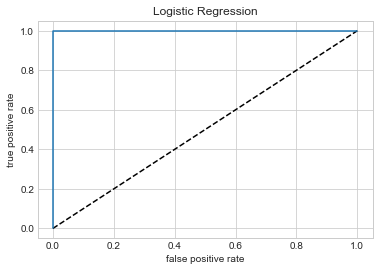

In [99]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show()

In [100]:
auc_score=roc_auc_score(y_test,logreg.predict(x_test))

In [101]:
print(auc_score)

1.0


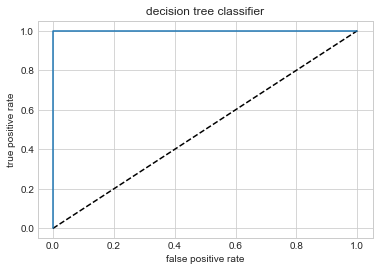

1.0

In [102]:
#decision tree curve

y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier') 
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('decision tree classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

In [103]:
from sklearn.linear_model import Lasso,Ridge

In [104]:
# x_train,x_test,y_train,y_test

#will reduce the coefficient to zero (those features are not informative)
#alpha values could be--------> .0001,.001,1,10----->higher values reduce all coefficients towards 0 and impact output
#default value of alpha-->1.0
#alpha=.01
#ls=lasso(alpha=1.0)  #default


ls=Lasso(alpha=0.0001)

ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9999994185206798

In [105]:
ls.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -6.59927578e-07,  0.00000000e+00, -4.43240674e-03,  1.88690795e-04,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -9.94999610e-01])

In [106]:
#try to minimize the coefficient variance

rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9999999999723612

In [107]:
rd.coef_

array([-7.35377626e-07,  5.21992329e-09, -3.06719047e-08,  2.31580956e-08,
        1.44392196e-09,  1.33960880e-05, -2.98800526e-05,  1.27677259e-05,
        3.71427570e-06, -5.76290849e-09, -1.57602434e-07,  1.57611802e-07,
       -2.29924284e-07,  2.94471951e-07, -6.42590350e-08, -2.89363821e-07,
       -3.09519376e-07, -3.01816923e-07, -1.14753818e-07, -3.94089516e-07,
       -5.70716790e-07, -4.65873794e-07, -3.95442653e-07, -3.00752137e-07,
        4.50328984e-07, -5.58254950e-07, -6.48050675e-08, -2.41482227e-07,
       -4.60659992e-08, -3.01816922e-07, -3.25981433e-07, -5.99376502e-07,
       -2.33803613e-07, -1.92523734e-07, -5.09827039e-07,  8.35885828e-06,
       -6.54313007e-07,  0.00000000e+00, -2.24366791e-07, -2.65437474e-07,
        5.63654484e-08, -3.39453793e-07, -1.28723405e-08, -4.42613585e-07,
       -4.22159983e-07, -2.87780338e-07, -1.09309222e-08,  1.33070276e-07,
       -1.21879026e-07, -9.99956921e-01])

In [108]:
#elasticnet is a combination of both lasso and ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)

#enr=elasticnet()

enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)

print(enr.score(x_train,y_train))
enr.coef_

0.9999949500669851


array([-0.00000000e+00, -8.23102030e-06,  0.00000000e+00,  0.00000000e+00,
       -3.27996295e-07,  0.00000000e+00, -1.55444543e-02,  1.25750082e-03,
       -0.00000000e+00,  2.66525257e-05,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.83110865e-01])

In [109]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)



svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
pred_y

array([0.90557605, 0.83744612, 0.63960469, 0.64579457, 0.90089599,
       0.85427992, 0.87817175, 0.90005921, 0.90929961, 0.87680596,
       0.92658126, 0.72899074, 0.68831874, 0.90201616, 0.89285127,
       0.88927119, 0.50028123, 0.950384  , 0.87978709, 0.86707652,
       0.66222706, 0.03358676, 0.55359369, 0.9027923 , 0.92228802,
       0.90118248, 0.90908718, 0.92281395, 0.90005921, 0.67231241,
       0.92064913, 0.91006501, 0.64531566, 0.92064913, 0.63608443,
       0.91183999, 0.90212082, 0.70319484, 0.68115527, 0.89076301,
       0.81758217, 0.58375435, 0.90880788, 0.84441097, 0.90348507,
       0.87898754, 0.7641655 , 0.90447546, 0.90529426, 0.5691775 ,
       0.8913534 , 0.5510742 , 0.89381869, 0.52260555, 0.55257009,
       0.74305599, 0.66200588, 0.86972888, 0.81590986, 0.64200293,
       0.60423594, 0.90005921, 0.90268819, 0.89337762, 0.88420624,
       0.83285731, 0.90514884, 0.87708135, 0.51405353, 0.65098637,
       0.87824863, 0.64535446, 0.63423839, 0.88385423, 0.74393

In [110]:

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.965967477960467
-0.008445020254410185
0.37658731122286426


In [111]:
#from sklearn.externals import joblib

import joblib#Joblib provides a better way to avoid recomputing the same function repetitively saving a lot of time and computational cost

#save the model as a object file

joblib.dump(dt,'dtfile.obj')
#load the model from the file

dt_from_joblib=joblib.load('dtfile.obj')

#use the loaded model to make predictions

dt_from_joblib.predict(x_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=uint8)

In [112]:
import pickle

#it's the process of converting a Python object into a byte stream to store it in a file/database, 
#maintain program state across sessions, or transport data over the network.

In [113]:
filename='pickleknnfile.pk1'

pickle.dump(knn,open(filename,'wb'))

#load the model from disk

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=uint8)